# Pretrain (training VAE)

In [ ]:
import gentrl
import torch
from moses.utils import CharVocab
import pandas as pd
from torch.utils.data import DataLoader

dataset_path = "./data/moses_qed_props.csv.gz"
ligase_dataset_path = "./data/train_ligase_2_filtered.csv"
ic50_dataset_path = "./data/train_ic50_3_filtered.csv"
save_path = "./saved_model"
save_path_cp = "./saved_model_checkpoint" 
check_point = "" # "-checkpoint_{num_epochs}" , keep empty to create new model
! mkdir {save_path}
! mkdir {save_path_cp}

In [ ]:
df = pd.read_csv(dataset_path, compression="gzip")
vocab = CharVocab.from_data(df['SMILES'])
torch.cuda.set_device(0)
enc = gentrl.RNNEncoder(vocab, latent_size=50)
dec = gentrl.DilConvDecoder(vocab, latent_input_size=50, split_len=100)
model = gentrl.GENTRL(enc, dec, 50 * [('c', 20)], [('c', 20)], beta=0.001)
torch.cuda.empty_cache()
model.cuda();
if check_point != '':
  model.load('saved_model_checkpoint/', version=check_point)
  model.cuda();

In [ ]:
props = ["MW", "ALOGP", "HBD", "HBA", "PSA", "ROTB", "AROM", "ALERTS"]
source = {
    "path": dataset_path,
    "smiles": "SMILES",
    "prob": 1,
}
for prop in props:
    source[prop] = prop

md = gentrl.MolecularDataset(sources=[source], props=props)

train_loader = DataLoader(md, batch_size=50, shuffle=True, num_workers=1, drop_last=True)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model.train_as_vaelp(train_loader, num_epochs=10, save_path=save_path_cp)
model.save(save_path)

Epoch 7 :
loss: -0.3502;rec: -0.1025;kl: -194.2;log_p_y_by_z: 2.584;log_p_z_by_y: -283.3;
loss: -0.3979;rec: -0.08429;kl: -205.1;log_p_y_by_z: 2.771;log_p_z_by_y: -287.7;
loss: -0.4033;rec: -0.08536;kl: -211.3;log_p_y_by_z: 2.774;log_p_z_by_y: -291.8;
loss: -0.4026;rec: -0.08874;kl: -214.7;log_p_y_by_z: 2.766;log_p_z_by_y: -295.8;
loss: -0.4022;rec: -0.091;kl: -217.8;log_p_y_by_z: 2.755;log_p_z_by_y: -297.7;
loss: -0.4073;rec: -0.08966;kl: -219.5;log_p_y_by_z: 2.775;log_p_z_by_y: -298.8;
loss: -0.4105;rec: -0.08761;kl: -220.4;log_p_y_by_z: 2.777;log_p_z_by_y: -300.1;
loss: -0.4047;rec: -0.09195;kl: -220.3;log_p_y_by_z: 2.763;log_p_z_by_y: -300.8;
loss: -0.4027;rec: -0.08849;kl: -217.4;log_p_y_by_z: 2.738;log_p_z_by_y: -298.3;
loss: -0.4059;rec: -0.0868;kl: -217.2;log_p_y_by_z: 2.755;log_p_z_by_y: -298.3;
loss: -0.4052;rec: -0.08903;kl: -220.2;log_p_y_by_z: 2.74;log_p_z_by_y: -300.8;
loss: -0.4115;rec: -0.08732;kl: -221.7;log_p_y_by_z: 2.772;log_p_z_by_y: -302.2;
loss: -0.4095;rec: -0.0

continued training

In [ ]:
df = pd.read_csv(dataset_path, compression="gzip")
vocab = CharVocab.from_data(df['SMILES'])
torch.cuda.set_device(0)
enc = gentrl.RNNEncoder(vocab, latent_size=50)
dec = gentrl.DilConvDecoder(vocab, latent_input_size=50, split_len=100)
model = gentrl.GENTRL(enc, dec, 50 * [('c', 20)], [('c', 20)], beta=0.001)
torch.cuda.empty_cache()
model.cuda();
model.load(save_path)
model.cuda();
save_path_c = "./saved_model_c"
! mkdir {save_path_c}

mkdir: cannot create directory ‘./saved_model_c’: File exists


In [ ]:
ligase_md = gentrl.MolecularDataset(sources=[{
    "path": ligase_dataset_path,
    "smiles": "Smiles",
    "prob": 1,
    "MW": "Molecular Weight",
    "ALOGP": "AlogP",
}], props=["MW", "ALOGP"])

train_loader = DataLoader(ligase_md, batch_size=50, shuffle=True, num_workers=1, drop_last=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (1,14,18,19,38) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model.train_as_vaelp(train_loader, num_epochs=100)
model.save(save_path_c)

Epoch 1 :
loss: 0.4395;rec: -0.2017;kl: -223.4;log_p_y_by_z: -4.613;log_p_z_by_y: -324.8;
loss: 0.2435;rec: -0.1641;kl: -229.8;log_p_y_by_z: -3.092;log_p_z_by_y: -321.5;
loss: 0.2009;rec: -0.1603;kl: -233.1;log_p_y_by_z: -2.738;log_p_z_by_y: -322.1;
loss: 0.1895;rec: -0.1524;kl: -233.0;log_p_y_by_z: -2.701;log_p_z_by_y: -322.2;
loss: 0.193;rec: -0.1504;kl: -234.2;log_p_y_by_z: -2.768;log_p_z_by_y: -323.2;
loss: 0.1735;rec: -0.1444;kl: -235.2;log_p_y_by_z: -2.643;log_p_z_by_y: -323.7;
loss: 0.1761;rec: -0.1442;kl: -229.0;log_p_y_by_z: -2.61;log_p_z_by_y: -320.0;
loss: 0.1978;rec: -0.1426;kl: -206.8;log_p_y_by_z: -2.62;log_p_z_by_y: -301.4;
loss: 0.1695;rec: -0.1304;kl: -221.7;log_p_y_by_z: -2.608;log_p_z_by_y: -311.4;
loss: 0.1657;rec: -0.1325;kl: -223.7;log_p_y_by_z: -2.569;log_p_z_by_y: -313.8;
loss: 0.1743;rec: -0.1363;kl: -221.7;log_p_y_by_z: -2.596;log_p_z_by_y: -311.4;
loss: 0.1657;rec: -0.1366;kl: -230.0;log_p_y_by_z: -2.59;log_p_z_by_y: -318.4;
loss: 0.1573;rec: -0.1304;kl: -233

# RL trainning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle
import gentrl
from moses.utils import CharVocab

import susi
from susi.SOMPlots import plot_estimation_map, plot_som_histogram, plot_umatrix
import torch

dataset_path = "./data/moses_qed_props.csv.gz"
save_path = "./model_rl"
save_path_cp = "./model_rl_checkpoint"
! mkdir {save_path}
! mkdir {save_path_cp}
check_point = "" # "-checkpoint_{num_iterations}" , keep empty to use pretrain model
torch.cuda.set_device(0)

mkdir: cannot create directory ‘./model_rl’: File exists


In [ ]:
df = pd.read_csv(dataset_path, compression="gzip")
vocab = CharVocab.from_data(df['SMILES'])
torch.cuda.set_device(0)
enc = gentrl.RNNEncoder(vocab, latent_size=50)
dec = gentrl.DilConvDecoder(vocab, latent_input_size=50, split_len=100)
model = gentrl.GENTRL(enc, dec, 50 * [('c', 20)], [('c', 20)], beta=0.001)
model.cuda();
if check_point != '':
  model.load('model_rl_checkpoint/', version=check_point)
else:
  model.load('saved_model/')
model.cuda();
from moses.utils import disable_rdkit_log
disable_rdkit_log()

In [ ]:
som_general = pickle.load(open("./SOMs/general_som_1M.p", "rb"))
som_specific = pickle.load(open("./SOMs/specific_som_800K.p", "rb"))

#disable log
som_general.verbose=0
som_general.tqdm_params_={"disable": True}
som_specific.verbose=0
som_specific.tqdm_params_={"disable": True}

In [ ]:
from moses.metrics import mol_passes_filters, SA, logP
from moses.metrics.utils import get_n_rings, get_mol

def get_num_rings_6(mol):
    r = mol.GetRingInfo()
    return len([x for x in r.AtomRings() if len(x) > 6])

def reward_func(mol_or_smiles, masked=False, default=-5):
    mol = get_mol(mol_or_smiles)
    if mol is None:
        return default
    smiles_tokenized = gentrl.tokenizer.encode([mol_or_smiles], vocab)[0][0].tolist()
    logP_award= 5 - (0.8 * abs(logP(mol)-3.5))
    SA_award = -SA(mol)
    rings_award = -get_num_rings_6(mol)
    general_award = 0.24*som_general.predict([smiles_tokenized])[0]
    specific_award = 0.94*som_specific.predict([smiles_tokenized])[0]
    reward = logP_award + SA_award + rings_award + specific_award + general_award
    if masked and not mol_passes_filters(mol):
        return default
    return reward

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model.train_as_rl(reward_func, num_iterations=100000, save_path=save_path_cp)
model.save(save_path)

# Sampling & Optimization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle
import gentrl
from moses.utils import CharVocab

import susi
from susi.SOMPlots import plot_estimation_map, plot_som_histogram, plot_umatrix
import torch
from rdkit.Chem import Draw
torch.cuda.set_device(0)

In [ ]:
check_point_sample = "-checkpoint_50000" # "-checkpoint_{num_iterations}"

dataset_path = "./data/moses_qed_props.csv.gz"
df = pd.read_csv(dataset_path, compression="gzip")
vocab = CharVocab.from_data(df['SMILES'])
torch.cuda.set_device(0)
enc = gentrl.RNNEncoder(vocab, latent_size=50)
dec = gentrl.DilConvDecoder(vocab, latent_input_size=50, split_len=100)
model = gentrl.GENTRL(enc, dec, 50 * [('c', 20)], [('c', 20)], beta=0.001)
model.cuda();
if check_point_sample != '':
  model.load('model_rl_checkpoint/', version=check_point_sample)
else:
  model.load('model_rl/')
model.cuda();

In [ ]:
som_general = pickle.load(open("./SOMs/general_som_1M.p", "rb"))
som_specific = pickle.load(open("./SOMs/specific_som_800K.p", "rb"))

#disable log
som_general.verbose=0
som_general.tqdm_params_={"disable": True}
som_specific.verbose=0
som_specific.tqdm_params_={"disable": True}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

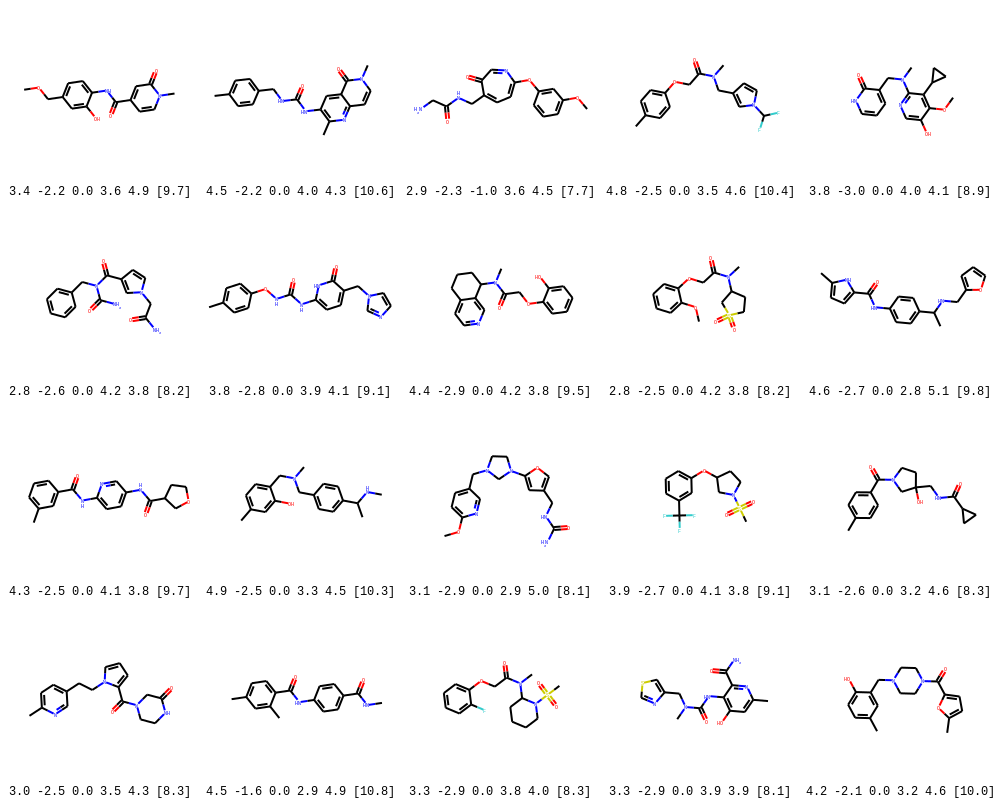

In [ ]:
from moses.metrics import mol_passes_filters, SA, logP
from moses.metrics.utils import get_n_rings, get_mol

def get_num_rings_6(mol):
    r = mol.GetRingInfo()
    return len([x for x in r.AtomRings() if len(x) > 6])

def score(mol_or_smiles, msg=False, default=-5):
    mol = get_mol(mol_or_smiles)
    if mol is None:
        return default
    smiles_tokenized = gentrl.tokenizer.encode([mol_or_smiles], vocab)[0][0].tolist()
    general_award = 0.24*som_general.predict([smiles_tokenized])[0]
    specific_award = 0.94*som_specific.predict([smiles_tokenized])[0]
    logP_award= 5 - (0.8 * abs(logP(mol)-3.5))
    SA_award = -SA(mol)
    rings_award = -get_num_rings_6(mol)
    reward = logP_award + SA_award + rings_award + specific_award + general_award
    msg_r = "%.1f %.1f %.1f %.1f %.1f [%.1f]" % (logP_award, SA_award, rings_award, general_award, specific_award, reward)
    if msg:
        return msg_r
    #return general_award + specific_award
    return reward

generated = []
sampled_valid = []
while len(generated) < 10000:
    sampled = model.sample(1000)
    sampled_valid = [s for s in sampled if get_mol(s)]
    generated += sampled_valid
generated = list(set(generated))
generated_sorted = sorted(generated, key=score, reverse=True)
Draw.MolsToGridImage([get_mol(s) for s in generated_sorted[:20]], molsPerRow=5,
                     legends=[str(score(s,msg=True)) for s in generated_sorted[:20]])

In [ ]:
Draw.MolsToGridImage([get_mol(s) for s in generated_sorted[-20:]], molsPerRow=5,
                     legends=[str(score(s,msg=True)) for s in generated_sorted[-20:]])

In [ ]:
Draw.MolsToGridImage([get_mol(s) for s in generated[:50]], molsPerRow=5,
                     legends=[str(score(s,msg=True)) for s in generated[:50]])

In [ ]:
score_res=[score(s) for s in generated[:100]]
score_mean = sum(score_res)/len(score_res)
print(score_mean)

7.999989087510151


In [ ]:
score_res=[score(s) for s in generated_sorted[:100]]
score_mean = sum(score_res)/len(score_res)
print(score_mean)

10.259818002487625


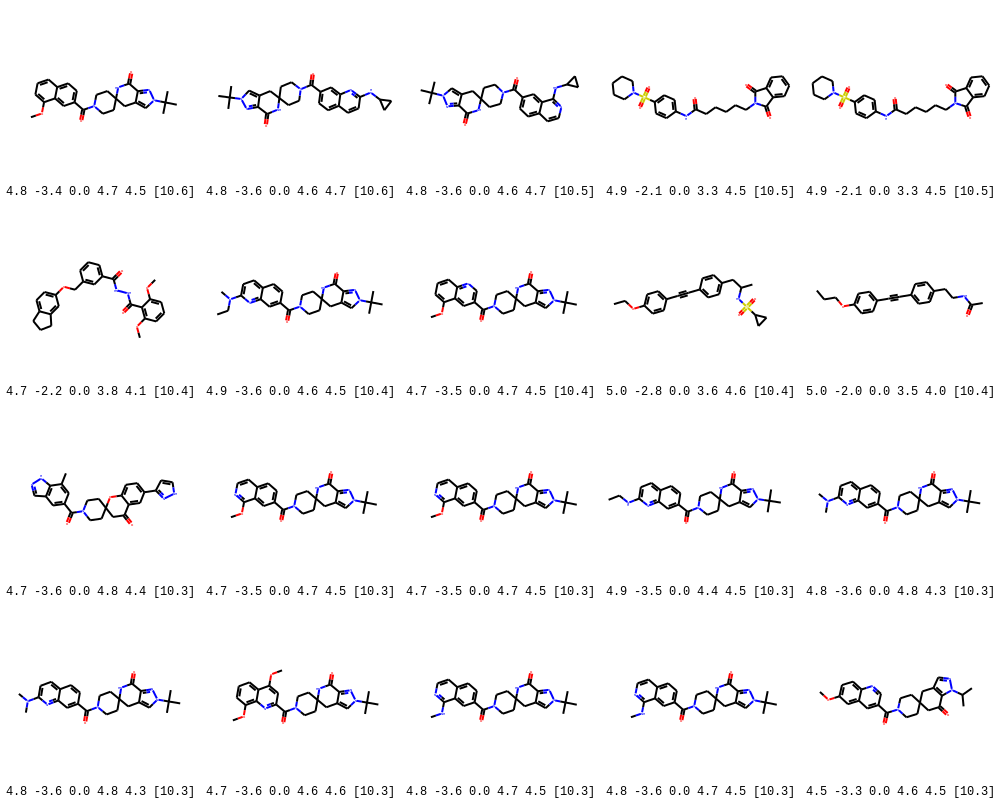

In [ ]:
dataset = "./data/train_ligase_filtered.csv"
#dataset = "./data/moses_qed_props.csv.gz"
#dataset = "./data/train_ligase_2_filtered.csv"
#dataset = "./data/train_ic50_3_filtered.csv"

df = pd.read_csv(dataset)
vocab = CharVocab.from_data(df['Smiles'])
smiles = df["Smiles"]

def score(mol_or_smiles, msg=False, default=-5):
    mol = get_mol(mol_or_smiles)
    if mol is None:
        return default
    smiles_tokenized = gentrl.tokenizer.encode([mol_or_smiles], vocab)[0][0].tolist()
    general_award = 0.24*som_general.predict([smiles_tokenized])[0]
    specific_award = 0.94*som_specific.predict([smiles_tokenized])[0]
    logP_award= 5 - (0.8 * abs(logP(mol)-3.5))
    SA_award = -SA(mol)
    rings_award = -get_num_rings_6(mol)
    reward = logP_award + SA_award + rings_award + specific_award + general_award
    msg_r = "%.1f %.1f %.1f %.1f %.1f [%.1f]" % (logP_award, SA_award, rings_award, general_award,specific_award,reward)
    if msg:
        return msg_r
    #return general_award + specific_award
    return reward

smiles_sorted = sorted(smiles, key=score, reverse=True)
Draw.MolsToGridImage([get_mol(s) for s in smiles_sorted[:20]],molsPerRow=5,
                     legends=[str(score(s,msg=True)) for s in smiles_sorted[:20]]
                     )

In [ ]:
sum=0
for s in smiles_sorted[:10]:
  sum += logP(get_mol(s))
print(sum/10)

3.7706040000000023


In [ ]:
sum=0
for s in generated_sorted:
  if not mol_passes_filters(get_mol(s)):
    sum+=1
print(sum)

562
